     Time (s)  X_Gyro (deg/s)  Y_Gyro (deg/s)  Z_Gyro (deg/s)  X_Accel (g)  \
0         0.0            0.07           -0.07           -0.02        -0.01   
1         0.5           -0.02            0.02           -0.05        -0.01   
2         1.0           -0.02           -0.05            0.05         0.00   
3         1.5           -0.02           -0.12            0.05        -0.01   
4         2.0           -0.03            0.02            0.00        -0.01   
..        ...             ...             ...             ...          ...   
753     376.5             NaN             NaN             NaN          NaN   
754     377.0             NaN             NaN             NaN          NaN   
755     377.5             NaN             NaN             NaN          NaN   
756     378.0             NaN             NaN             NaN          NaN   
757     378.5             NaN             NaN             NaN          NaN   

     Y_Accel (g)  Z_Accel (g)  Temperature (C)  Pressure (Pa)  

ValueError: Axis limits cannot be NaN or Inf

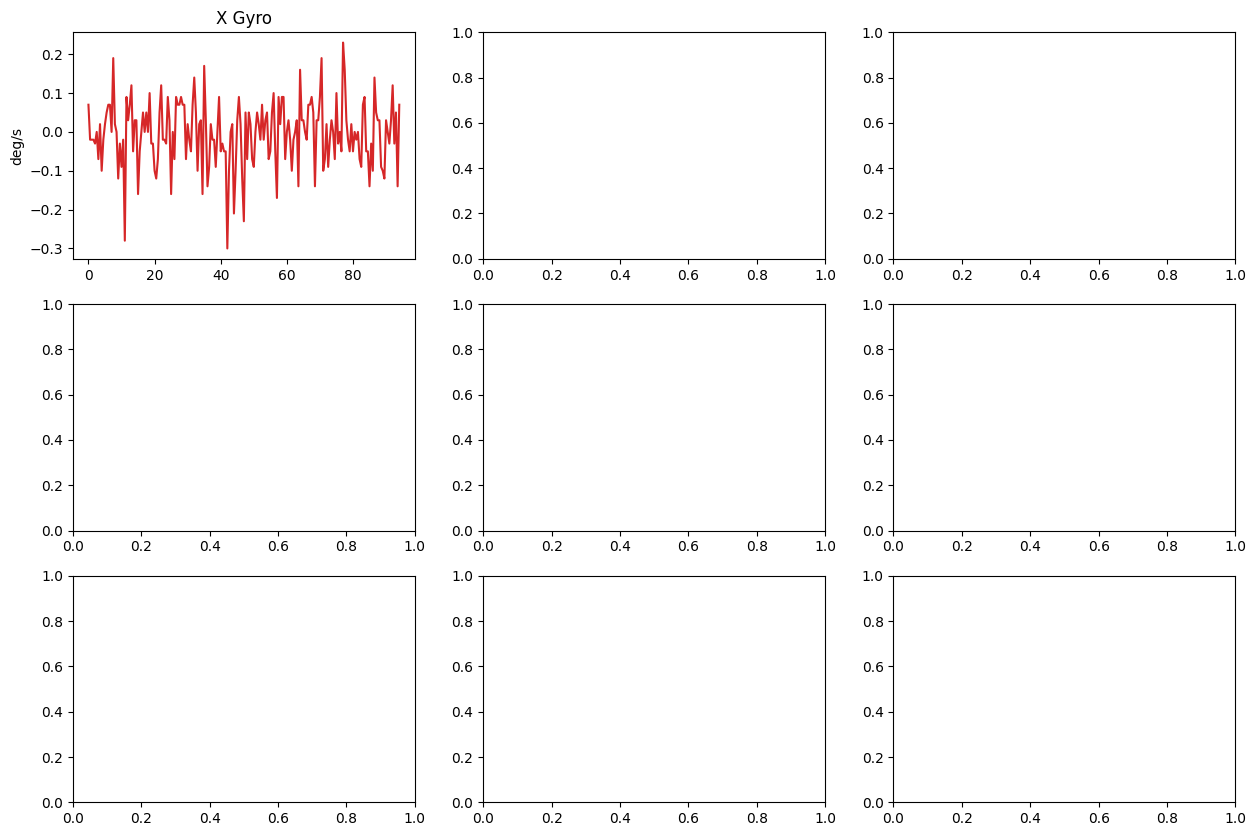

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Import data using Pandas
data = pd.read_csv("sensor_data.csv")
print(data)

# Retrieve data columns
time = data['Time (s)'].to_numpy()
x_gyro = data['X_Gyro (deg/s)'].to_numpy()
y_gyro = data['Y_Gyro (deg/s)'].to_numpy()
z_gyro = data['Z_Gyro (deg/s)'].to_numpy()
x_accel = data['X_Accel (g)'].to_numpy()
y_accel = data['Y_Accel (g)'].to_numpy()
z_accel = data['Z_Accel (g)'].to_numpy()
temperature = data['Temperature (C)'].to_numpy()
pressure = data['Pressure (Pa)'].to_numpy()

# Filter out NaN or infinite values for gyroscope and accelerometer data
valid_x_gyro = x_gyro[np.isfinite(x_gyro)]
valid_y_gyro = y_gyro[np.isfinite(y_gyro)]
valid_z_gyro = z_gyro[np.isfinite(z_gyro)]
valid_x_accel = x_accel[np.isfinite(x_accel)]
valid_y_accel = y_accel[np.isfinite(y_accel)]
valid_z_accel = z_accel[np.isfinite(z_accel)]

# Determine the min/max values for gyroscope and accelerometer data
gyro_min = min(np.min(valid_x_gyro), np.min(valid_y_gyro), np.min(valid_z_gyro))
gyro_max = max(np.max(valid_x_gyro), np.max(valid_y_gyro), np.max(valid_z_gyro))

accel_min = min(np.min(valid_x_accel), np.min(valid_y_accel), np.min(valid_z_accel))
accel_max = max(np.max(valid_x_accel), np.max(valid_y_accel), np.max(valid_z_accel))

# Create a plot
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Plot gyroscope data with same scale for all axes
axs[0, 0].plot(time, x_gyro, 'tab:red')
axs[0, 0].set_title('X Gyro')
axs[0, 0].set_ylabel('deg/s')
axs[0, 0].set_ylim(gyro_min, gyro_max)

axs[0, 1].plot(time, y_gyro, 'tab:orange')
axs[0, 1].set_title('Y Gyro')
axs[0, 1].set_ylabel('deg/s')
axs[0, 1].set_ylim(gyro_min, gyro_max)

axs[0, 2].plot(time, z_gyro, 'tab:green')
axs[0, 2].set_title('Z Gyro')
axs[0, 2].set_ylabel('deg/s')
axs[0, 2].set_ylim(gyro_min, gyro_max)

# Plot accelerometer data with same scale for all axes
axs[1, 0].plot(time, x_accel, 'tab:blue')
axs[1, 0].set_title('X Accel')
axs[1, 0].set_ylabel('g')
axs[1, 0].set_ylim(accel_min, accel_max)

axs[1, 1].plot(time, y_accel, 'tab:purple')
axs[1, 1].set_title('Y Accel')
axs[1, 1].set_ylabel('g')
axs[1, 1].set_ylim(accel_min, accel_max)

axs[1, 2].plot(time, z_accel, 'tab:brown')
axs[1, 2].set_title('Z Accel')
axs[1, 2].set_ylabel('g')
axs[1, 2].set_ylim(accel_min, accel_max)

# Plot temperature and pressure data
axs[2, 0].plot(time, temperature, 'tab:pink')
axs[2, 0].set_title('Temperature')
axs[2, 0].set_ylabel('°C')

axs[2, 1].plot(time, pressure, 'tab:cyan')
axs[2, 1].set_title('Pressure')
axs[2, 1].set_ylabel('Pa')

# Use ScalarFormatter for normal number display on the pressure axis
axs[2, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[2, 1].ticklabel_format(style='plain', axis='y')

# Remove the last empty subplot
fig.delaxes(axs[2, 2])

# Set x-axis labels
for ax in axs.flat:
    ax.set_xlabel('Time (s)')

# Adjust layout
plt.tight_layout()